**SMDM Project**
Austo Motor Company

Problem 1:

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

Objective: Come up with insights to improve the marketing campaign.


In [1]:
#Load the necessary libraries. Import and load the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.23.5
1.5.3
0.12.2


Exploratory Data Analysis(EDA)
1. Descriptive Analytics

In [3]:
Data = pd.read_csv('Austo.csv')
Data

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


A. What is the important technical information about the dataset that a database administrator would be interested in? 
1.Size of the dataset
2.Nature of the variables



In [4]:
Data.shape

(1581, 14)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


Gender and Partner Salary column has null values and rest all columns looks good. 

In [6]:
#Check for duplicate data

dups = Data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Data[dups]

Number of duplicate rows = 0


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [7]:
Data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


Gender unique values says 4, it should be cleaned.


In [8]:
Data['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

2. Data Pre-Processing

In [9]:
Data['Gender'].replace(('Femal','Femle'),'Female',inplace=True)

In [10]:
Data['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

For the Gender column, since it is categorical , lets replace the NaN with mode value of the column.

In [11]:
Data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [12]:
Data['Gender'].replace(np.NaN,'Male',inplace=True)

In [13]:
Data['Gender'].value_counts()


Male      1252
Female     329
Name: Gender, dtype: int64

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


Lets work on Partner Salary column. Since Total Salary= Salary+Partner Salary. We should be able to find out the missing values.

In [15]:
Data['Partner_salary']=Data['Total_salary']-Data['Salary']

In [16]:
Data['Partner_salary'].isnull().value_counts()

False    1581
Name: Partner_salary, dtype: int64

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.0+ KB


In [18]:
Data.describe()


,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,19233.776091,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19670.391171,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25100.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38100.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


<Axes: xlabel='Age'>

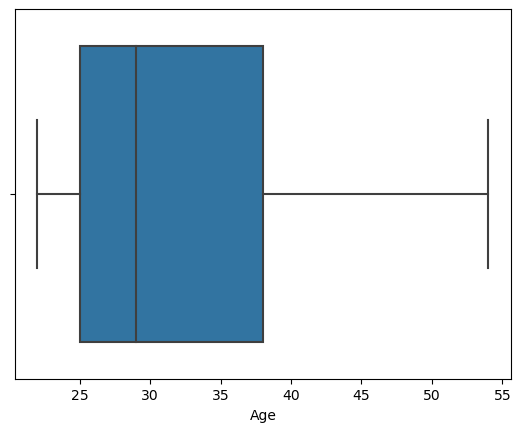

In [19]:
sns.boxplot(data=Data,x='Age')

<Axes: xlabel='No_of_Dependents'>

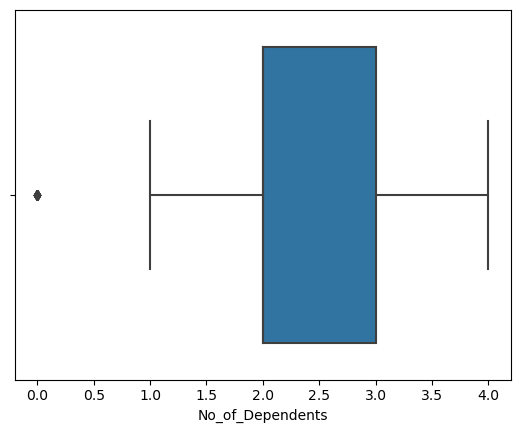

In [20]:
sns.boxplot(data=Data,x='No_of_Dependents')

Since the data here is genuine. Treating this outlier is not mandatory.

<Axes: xlabel='Salary'>

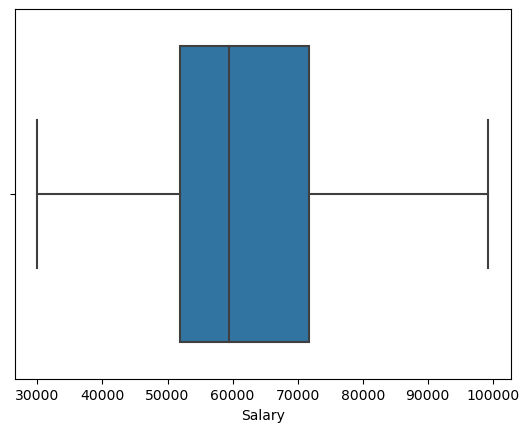

In [21]:
sns.boxplot(data=Data,x='Salary')

<Axes: xlabel='Partner_salary'>

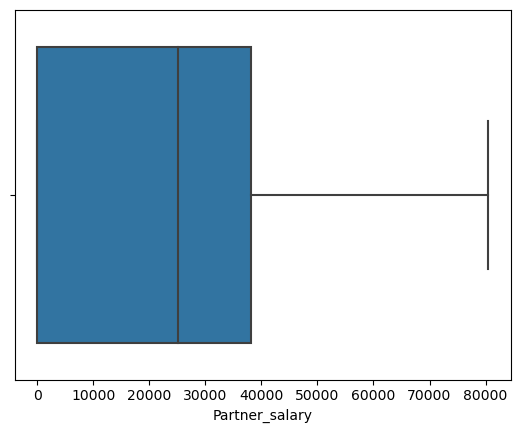

In [22]:
sns.boxplot(data=Data,x='Partner_salary')

<Axes: xlabel='Total_salary'>

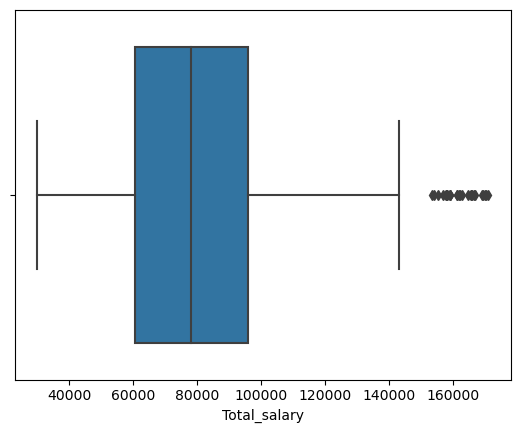

In [23]:
sns.boxplot(data=Data,x='Total_salary')

In [24]:
def detect_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    
    return lower_range, upper_range

In [25]:
lr,ur=detect_outlier(Data['Total_salary'])
print("lower range",lr, "and upper range", ur)

lower range 7400.0 and upper range 149000.0


In [26]:
Data['Total_salary'] = np.where(Data['Total_salary'] <  lr, lr, Data['Total_salary'])
Data['Total_salary'] = np.where(Data['Total_salary'] >  ur, ur, Data['Total_salary'])

<Axes: xlabel='Total_salary'>

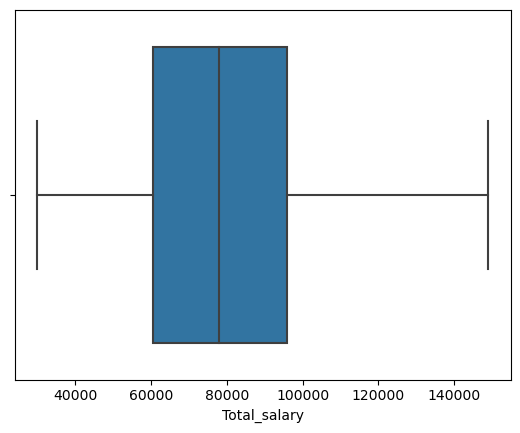

In [27]:
sns.boxplot(data=Data,x='Total_salary')

In [28]:
Data.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,19233.776091,79398.545225,35597.722960
std,8.425978,0.943483,14674.825044,19670.391171,24849.147996,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25100.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38100.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,149000.000000,70000.000000


<Axes: xlabel='Price'>

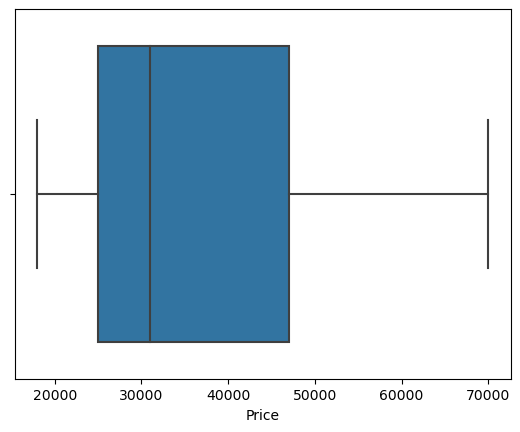

In [29]:
sns.boxplot(data=Data,x='Price')

In [30]:
Data.describe(include='all')

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,1581.000000,1581,1581,1581,1581,1581.000000,1581,1581,1581,1581.000000,1581.000000,1581.000000,1581.000000,1581
unique,NaN,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,3
top,NaN,Male,Salaried,Married,Post Graduate,NaN,Yes,No,Yes,NaN,NaN,NaN,NaN,Sedan
freq,NaN,1252,896,1443,985,NaN,792,1054,868,NaN,NaN,NaN,NaN,702
mean,31.922201,NaN,NaN,NaN,NaN,2.457938,NaN,NaN,NaN,60392.220114,19233.776091,79398.545225,35597.722960,NaN
std,8.425978,NaN,NaN,NaN,NaN,0.943483,NaN,NaN,NaN,14674.825044,19670.391171,24849.147996,13633.636545,NaN
min,22.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,30000.000000,0.000000,30000.000000,18000.000000,NaN
25%,25.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,51900.000000,0.000000,60500.000000,25000.000000,NaN
50%,29.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,59500.000000,25100.000000,78000.000000,31000.000000,NaN
75%,38.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,71800.000000,38100.000000,95900.000000,47000.000000,NaN


Data Visualization


Univariate Analysis

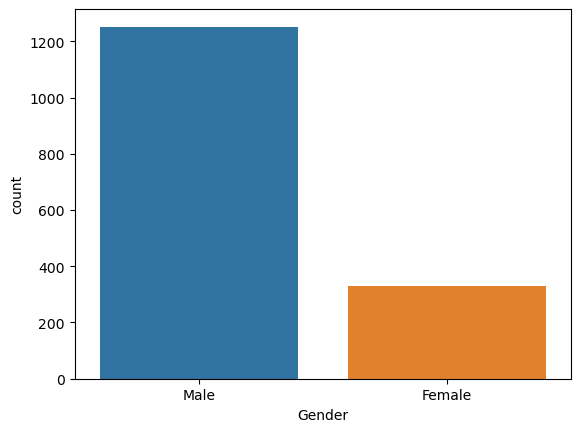

In [31]:
sns.countplot(data=Data,x='Gender');

Significant proportion of the data belongs to the male category.

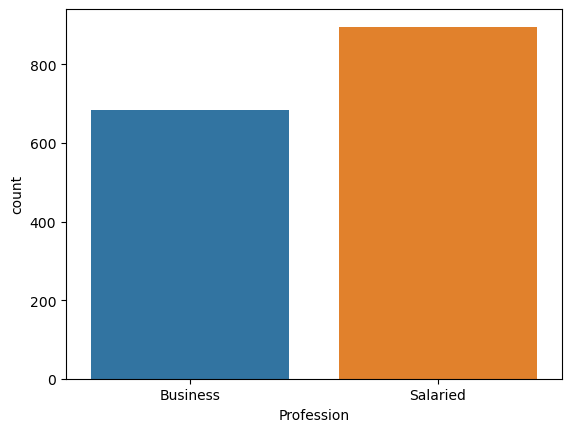

In [32]:
sns.countplot(data=Data,x='Profession');

Salaried individuals are likely to purchase compartively as they are on a higher side.

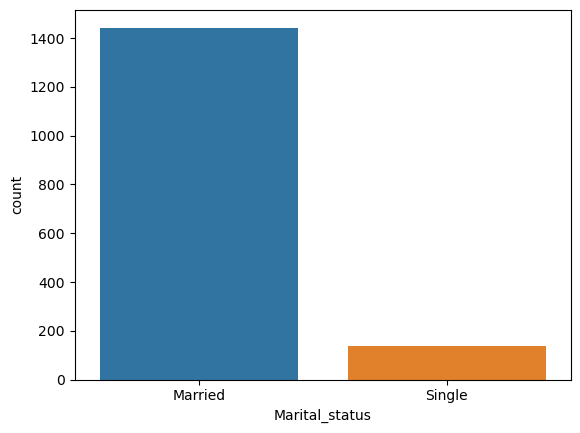

In [33]:
sns.countplot(data=Data,x='Marital_status');

Significant purchase of cars are seen in individuals who are married.

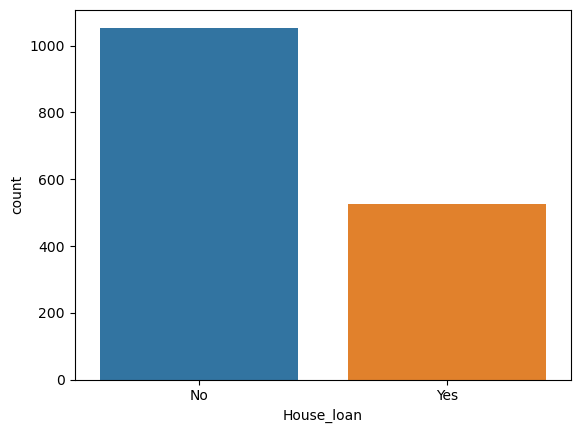

In [34]:
sns.countplot(data=Data,x='House_loan');

Individuals with no house loans are on the higher side.The presence of home loan in the data can provide insights into financial profiles of car owners. Differences in car ownership between those with and without home loans.


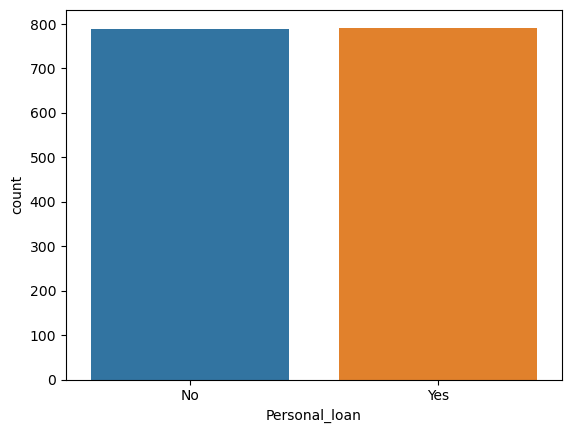

In [35]:
sns.countplot(data=Data,x='Personal_loan');

The data is more likely equally distributed.

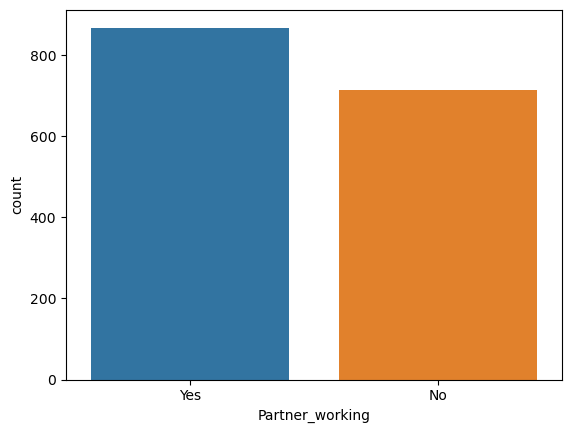

In [36]:
sns.countplot(data=Data,x='Partner_working');

Purchase of cars are likely higher among the individuals who have a working partner.

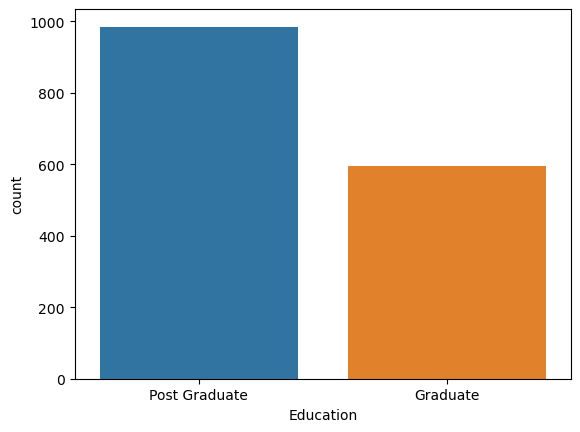

In [37]:
sns.countplot(data=Data,x='Education');

Post Graduate individuals have the tendency to make the purchase.

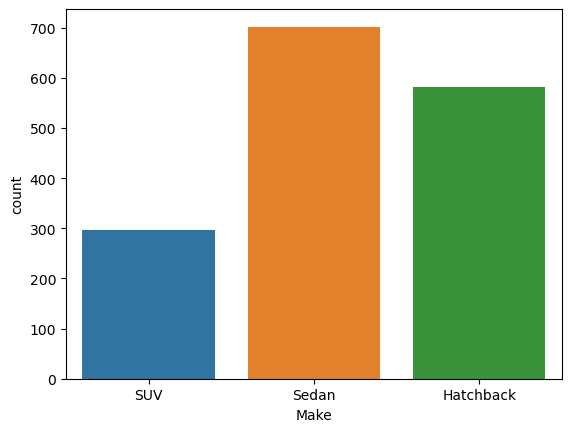

In [38]:
sns.countplot(data=Data,x='Make');

Tendency to purchase a Sedan or hatchback is on the higher end when compared with an SUV.

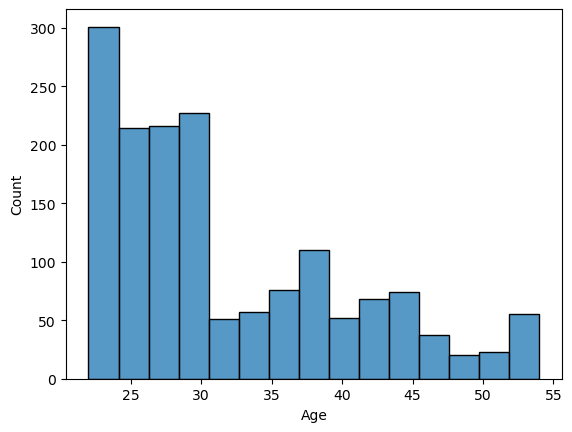

In [39]:
sns.histplot(data=Data,x='Age');

The count is higher around the age group betweeen 22-30. Close to 50% of the data is captured under this age group.
About 75% of the data shows that the customers purchasing the car fall under 40 age group.


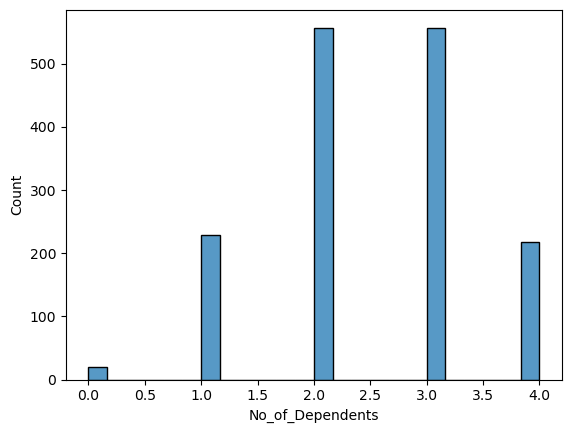

In [40]:
sns.histplot(data=Data,x='No_of_Dependents');

The graph represented is multimodal. The highest distribution having 2,3 number of dependents and 2nd highest having 1,4 no of dependents.

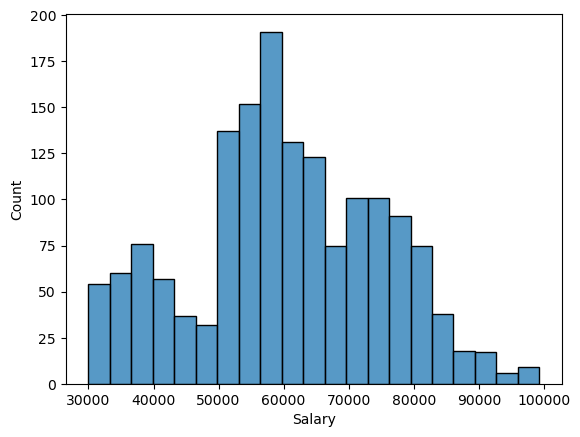

In [41]:
sns.histplot(data=Data,x='Salary');

Individuals with salary range from 50k-80k have high purchasing power.

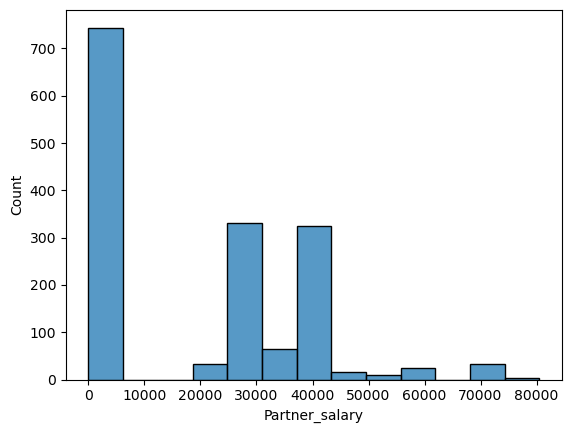

In [42]:
sns.histplot(data=Data,x='Partner_salary');

Significant number of individuals having 0-5k partner salary are willing to purchase the car.

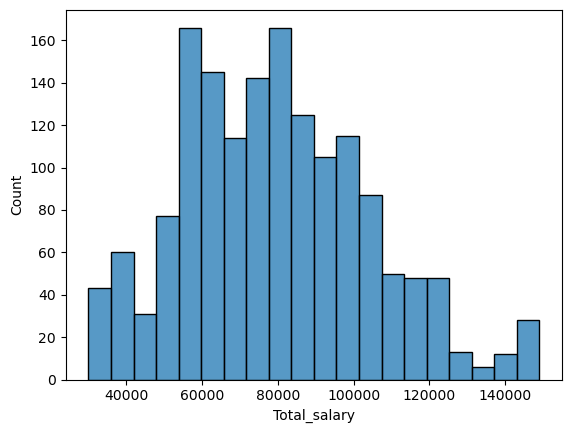

In [43]:
sns.histplot(data=Data,x='Total_salary');

Mean of the total salary is around 80k.

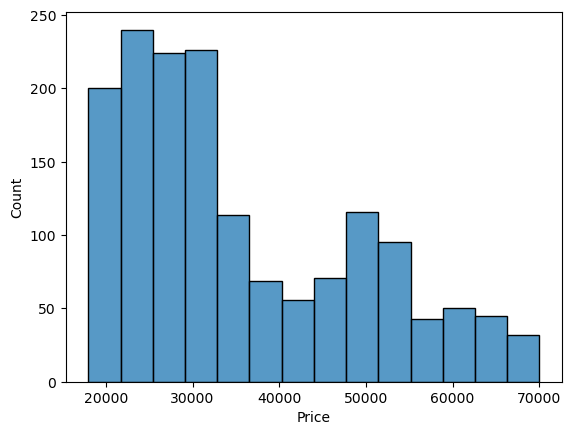

In [44]:
sns.histplot(data=Data,x='Price');

Close to 75% of the customers fall under the price range 18k to 47k. Majority of the customers (50%) have cars worth **under** 32k slab range.

Bi-Variate Analysis and Multi-Variate Analysis:

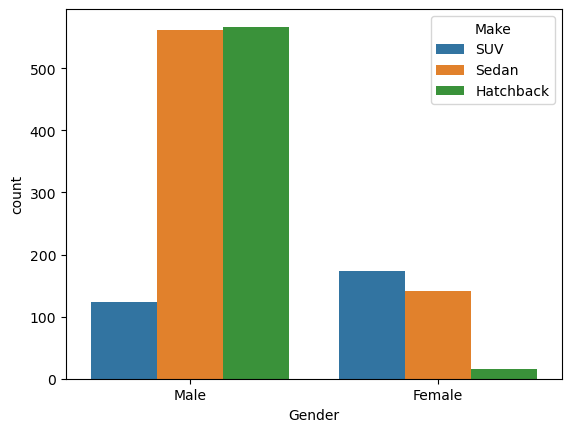

In [45]:
sns.countplot(data=Data,x='Gender',hue='Make');

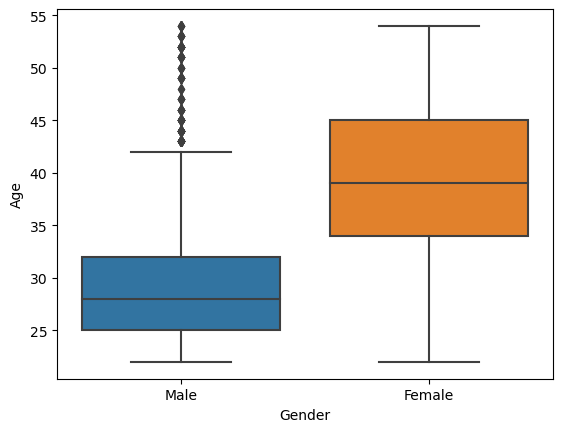

In [46]:
sns.boxplot(data=Data,x='Gender',y='Age');

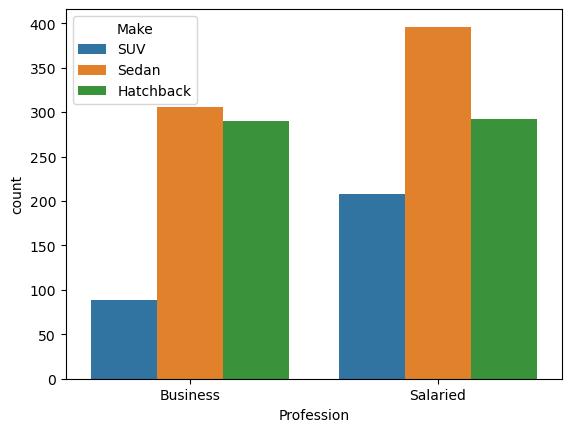

In [47]:
sns.countplot(data=Data,x='Profession',hue='Make');

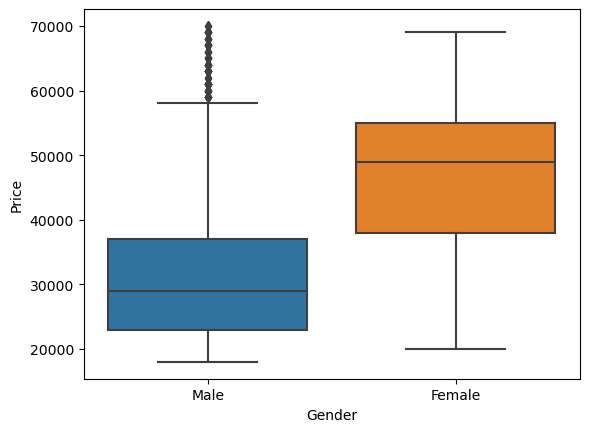

In [48]:
sns.boxplot(data=Data,x='Gender',y='Price');

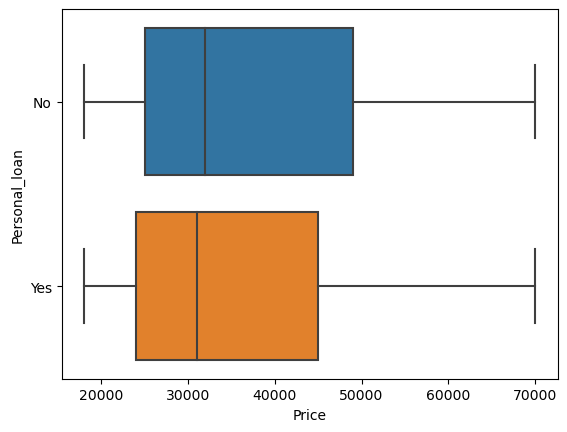

In [49]:
sns.boxplot(data=Data,x='Price',y='Personal_loan');

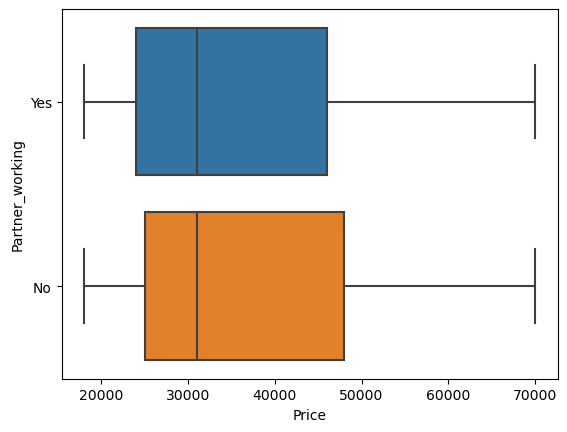

In [50]:
sns.boxplot(data=Data,x='Price',y='Partner_working');

For the current analysis use Gender and Marital_status - fields to arrive at groups with similar purchase history.

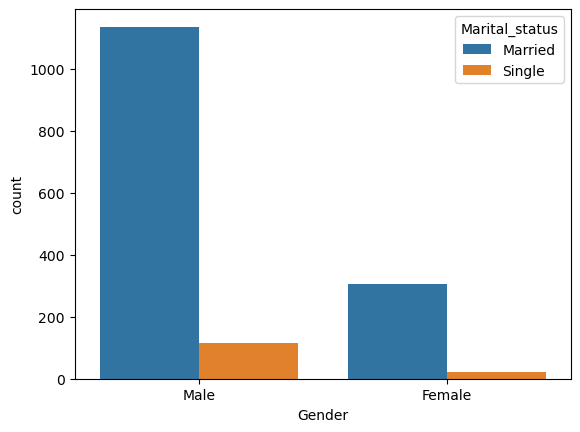

In [51]:
sns.countplot(data=Data,x='Gender',hue='Marital_status');

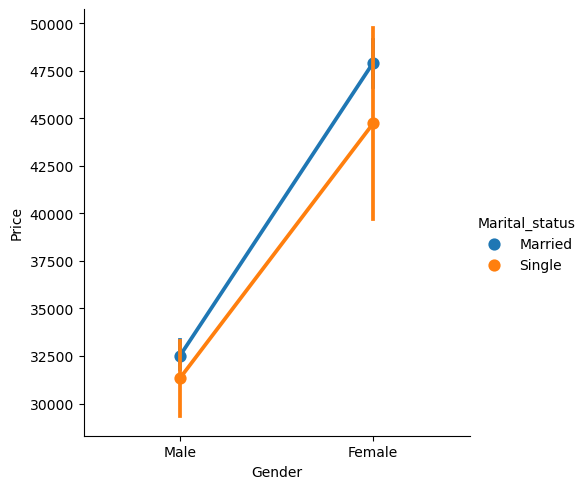

In [52]:
sns.catplot(data=Data,x='Gender',hue='Marital_status', y='Price',kind='point')

<Axes: xlabel='Gender,Marital_status'>

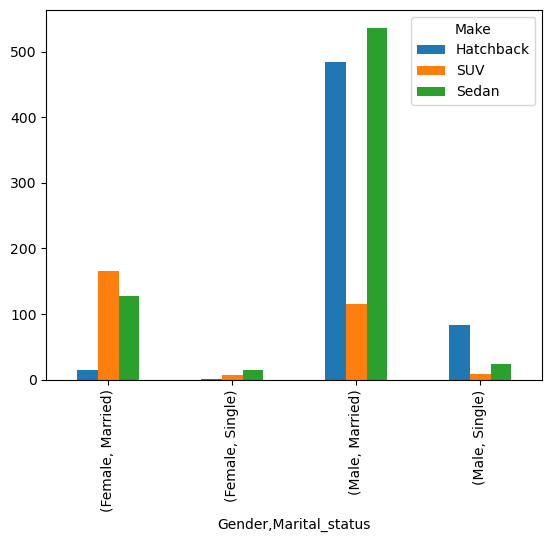

In [116]:
GMM= pd.crosstab(index=[Data['Gender'],Data['Marital_status']], columns=Data['Make'])
GMM.plot(kind='bar')

<Axes: xlabel='Gender,No_of_Dependents'>

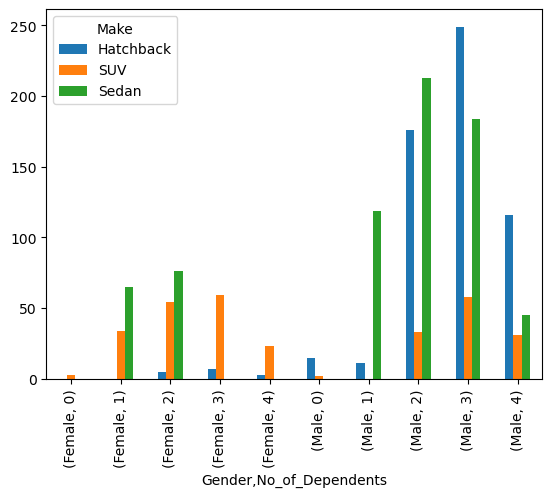

In [94]:
dependentsanalysis= pd.crosstab(index=[Data['Gender'],Data['No_of_Dependents']], columns=Data['Make'])
dependentsanalysis.plot(kind='bar')

<Axes: xlabel='Gender,No_of_Dependents'>

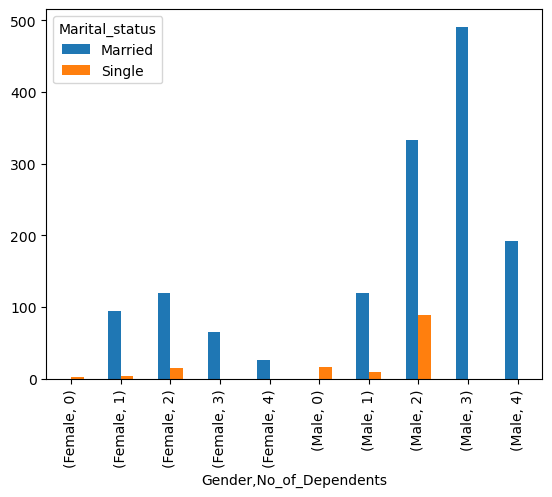

In [120]:
GMM= pd.crosstab(index=[Data['Gender'],Data['No_of_Dependents']], columns=Data['Marital_status'])
GMM.plot(kind='bar')

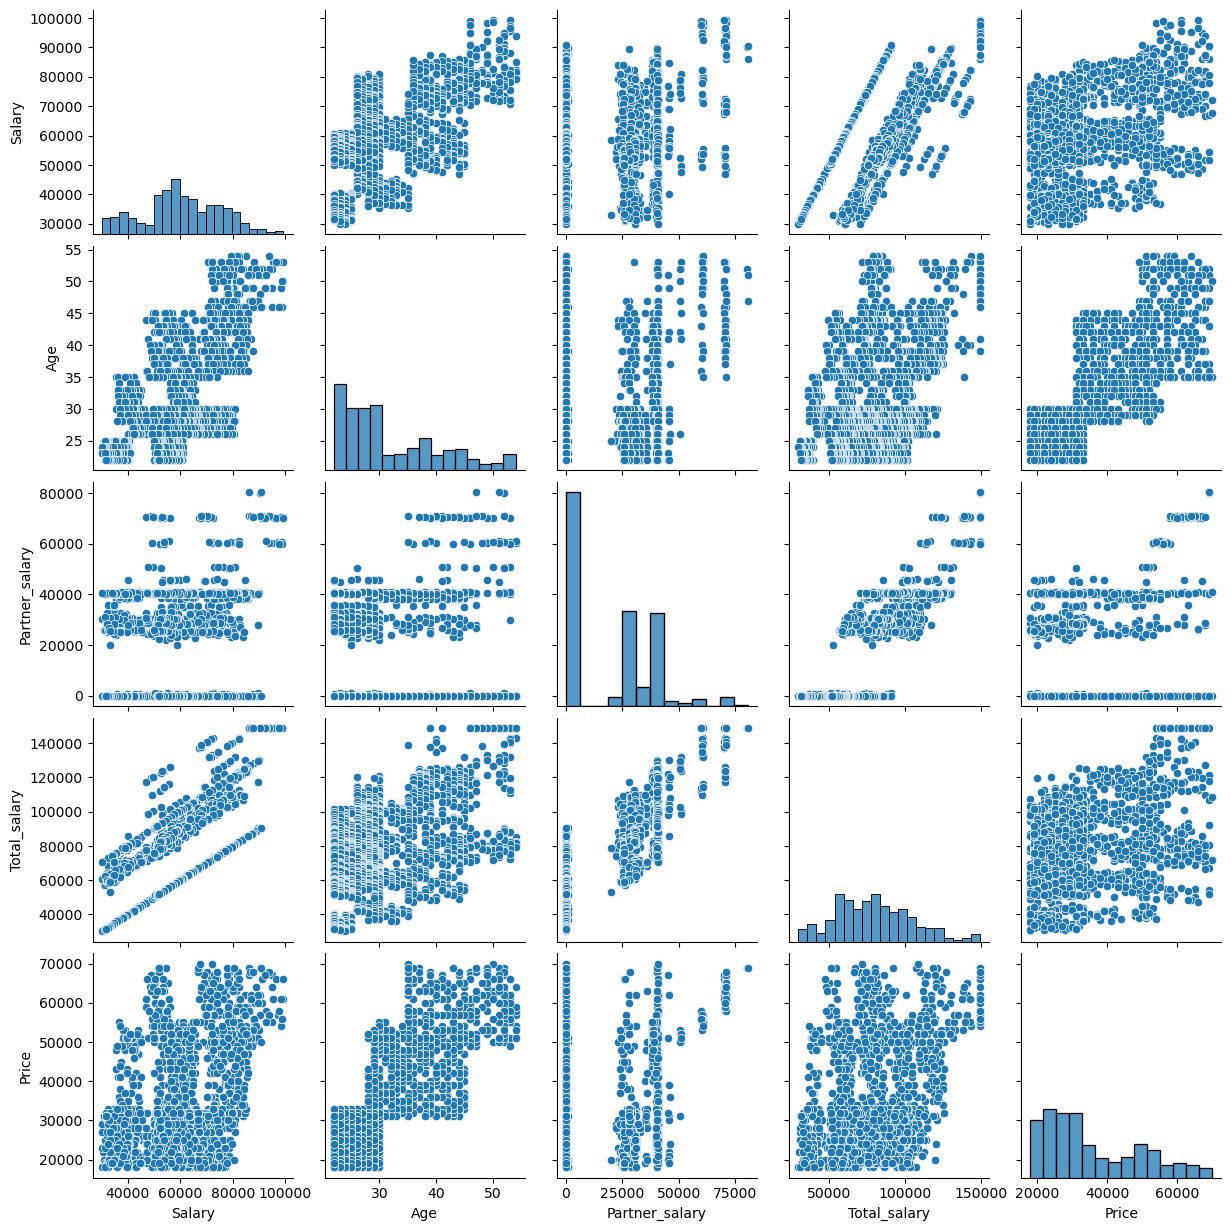

In [54]:
sns.pairplot(data=Data[['Salary','Age','Partner_salary','Total_salary','Price']]);

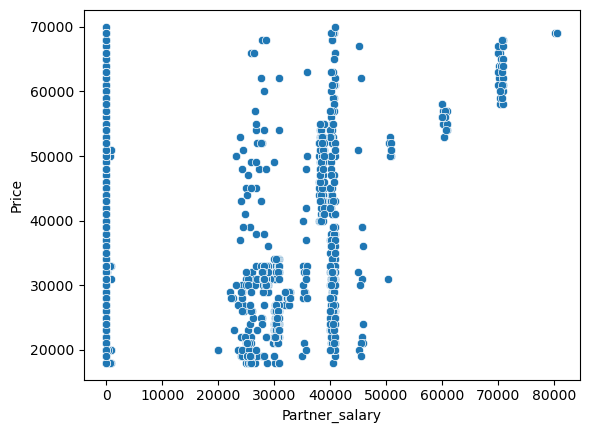

In [55]:
sns.scatterplot(data=Data, x='Partner_salary',y='Price');

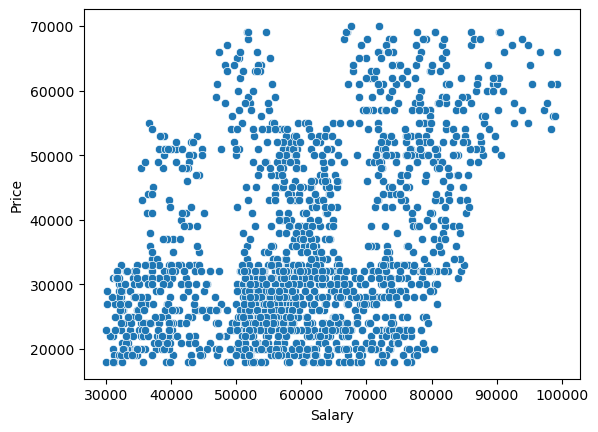

In [56]:
sns.scatterplot(data=Data, x='Salary',y='Price');

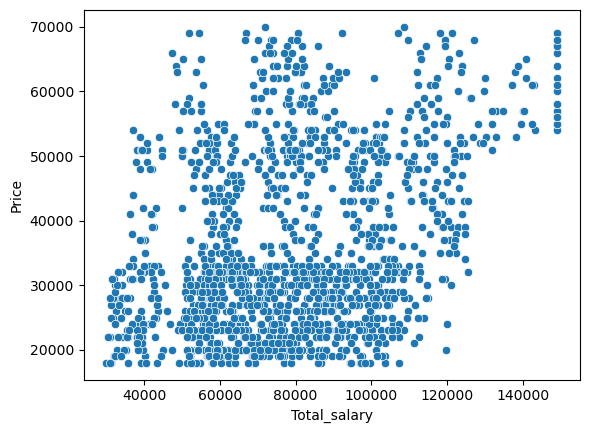

In [57]:
sns.scatterplot(data=Data, x='Total_salary',y='Price');

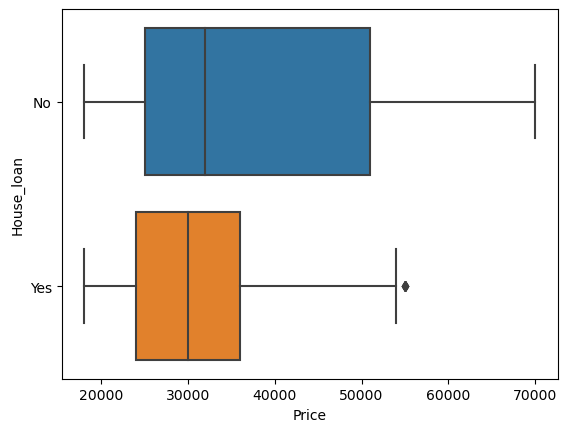

In [58]:
sns.boxplot(data=Data,x='Price',y='House_loan');

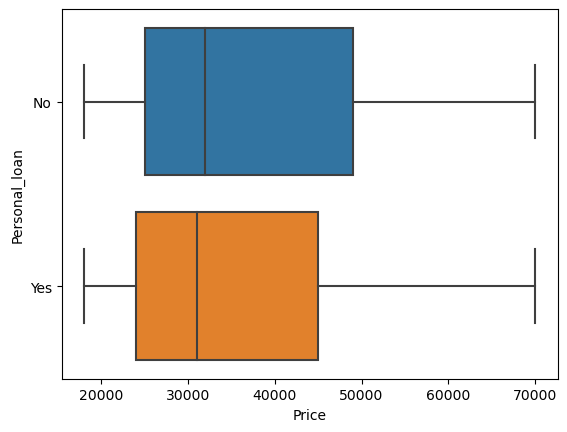

In [59]:
sns.boxplot(data=Data,x='Price',y='Personal_loan');

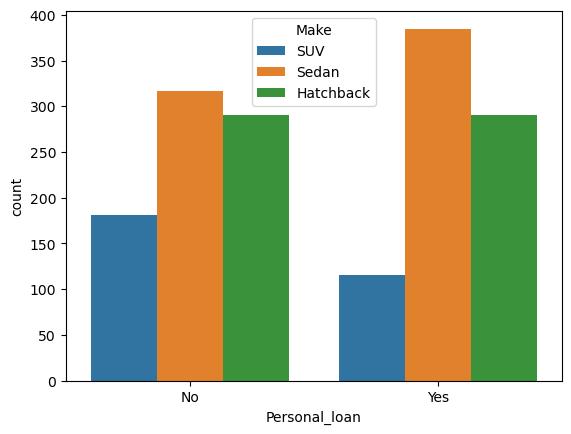

In [60]:
sns.countplot(data=Data,x='Personal_loan',hue='Make');

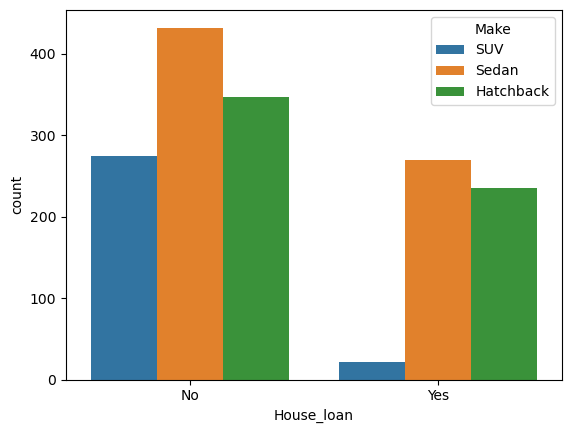

In [61]:
sns.countplot(data=Data,x='House_loan',hue='Make');

/var/folders/yq/z63tdr0j1q52c_hyw7dbw7p80000gn/T/ipykernel_73005/4070452515.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(),annot=True,fmt=".2f");


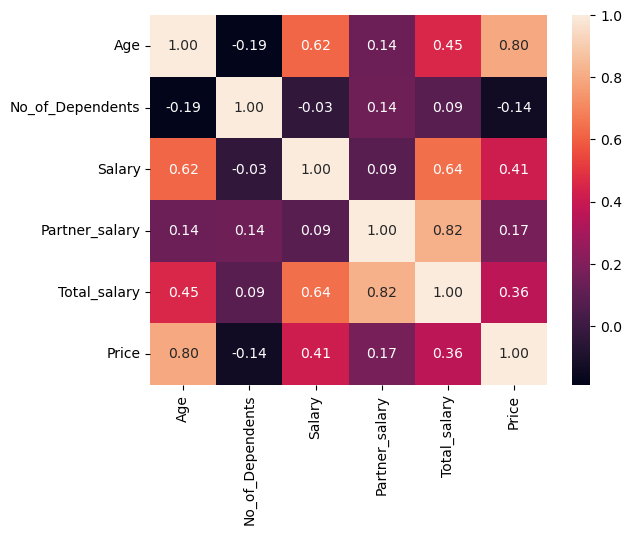

In [62]:
sns.heatmap(Data.corr(),annot=True,fmt=".2f");


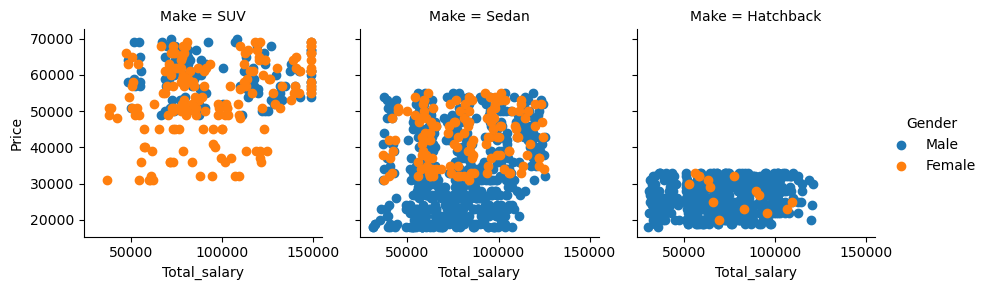

In [63]:
g = sns.FacetGrid(Data, col="Make", hue='Gender',col_wrap=3, height=3)
g = g.map(plt.scatter, "Total_salary", 'Price')
g.add_legend()

In [90]:
pd.crosstab(index=Data['Profession'], columns=[Data['Make'], Data['Gender']],margins=True)


Make       Hatchback         SUV       Sedan        All
Gender        Female Male Female Male Female Male      
Profession                                             
Business           0  290     55   34     50  256   685
Salaried          15  277    118   90     91  305   896
All               15  567    173  124    141  561  1581

Text(0, 0.5, 'Profession')

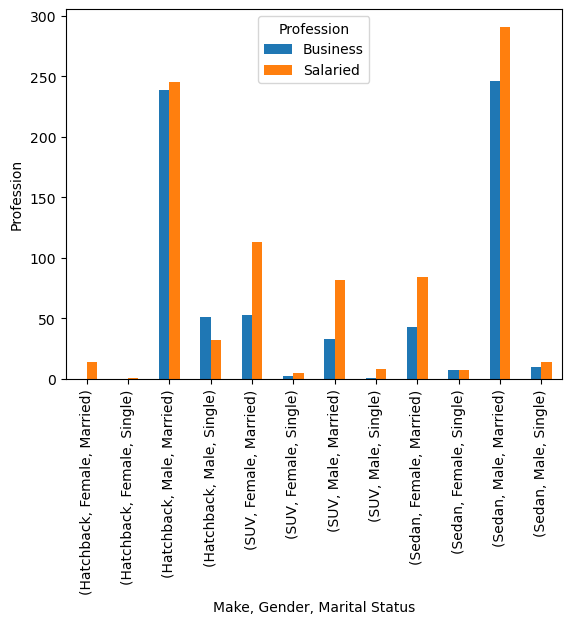

In [88]:
customer_analysis= pd.crosstab(index=[Data['Make'],Data['Gender'],Data['Marital_status']], columns=Data['Profession'])
customer_analysis.plot(kind='bar')
plt.xlabel('Make, Gender, Marital Status')
plt.ylabel('Profession')

<Axes: xlabel='Personal_loan', ylabel='Price'>

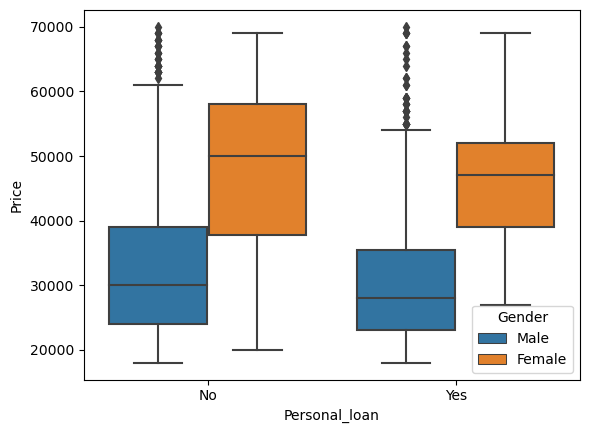

In [97]:
sns.boxplot(data=Data, x='Personal_loan', y='Price',hue='Gender')

In [101]:
Data.groupby(['Gender'])['Price'].mean()

Gender
Female    47705.167173
Male      32416.134185
Name: Price, dtype: float64

In [105]:
Data.groupby(['Gender'])['Price'].sum()

Gender
Female    15695000
Male      40585000
Name: Price, dtype: int64

In [106]:
Data.groupby(['Personal_loan'])['Price'].sum()

Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64

In [107]:
Data.groupby(['Personal_loan'])['Price'].mean()

Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64

In [109]:
Data.groupby(['Personal_loan'])['Price'].median()

Personal_loan
No     32000.0
Yes    31000.0
Name: Price, dtype: float64

In [110]:
Data.groupby(['Partner_working'])['Price'].median()

Partner_working
No     31000.0
Yes    31000.0
Name: Price, dtype: float64

In [111]:
Data.groupby(['Partner_working'])['Price'].mean()

Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64

In [112]:
Data.groupby(['Partner_working'])['Price'].sum()

Partner_working
No     25668000
Yes    30612000
Name: Price, dtype: int64